## Global Terrorism Database Analysis

Model which predicts responsible groups for terrorist attacks using historical data.

The open-source database(GTD) has been maintained at : http://www.start.umd.edu/gtd/ by National Consortium for the
study of terrorism and Responses of Terrorism (START). 

The database includes information about all the terrorist attacks from 1970 to 2014.

## Description

The database details information about all the terrorist attacks all over the world from 1970 to 2014 including information about description of the attack, terrorist groups invloved, weapons used, attack type etc.for each terrorist attack. 

However certain incidents have not been attributed to any particular terrorist group. This model attempts to predict the terorist group responsible for such attacks.

## Evaluation

The dataset has been split into two groups - one for training and evaluating the model and the other(test dataset) - to run the model on.

The training dataset has information about the terrorist group involved for the attack - the model trained on this attack will be used to generate predictions for the test dataset.

## Setup Imports and Variables

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))
matplotlib.style.use('ggplot')

## Explore the Data

<b> Read the data: <b>

The database has been downloaded as a csv file and is loaded into a Pandas DataFrame.

In [3]:
df_gtd = pd.read_csv('gtd_0615dist/globalterrorismdb_0615dist.csv')
df_gtd.head()

C:\Users\Keshav\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (4,6,13,31,33,53,61,62,63,75,78,91,93,95,113,114,120) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


<b> Information about the DataFrame: <b>

In [4]:
len(df_gtd)

141966

There are over 1.41k terrorist attacks that has been recorded in this database.

In [5]:
len(df_gtd.columns)

134

A total of 134 attributes for each attack has been recorded.

In [6]:
df_gtd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141966 entries, 0 to 141965
Columns: 134 entries, eventid to related
dtypes: float64(52), int64(23), object(59)
memory usage: 146.2+ MB


Many of the column datatypes are of type object (52)  which have be to changed to number representations as models usually don't work very well on string objects.

<b> Descriptive Statistics about the dataframe:

In [7]:
df_gtd.describe()

,eventid,iyear,imonth,iday,extended,country,region,longitude,specificity,vicinity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.419660e+05,141966.000000,141966.000000,141966.000000,141966.000000,141966.000000,141966.000000,115631.000000,118632.000000,141966.000000,...,1.119000e+03,3.380000e+02,548.000000,329.000000,7347.000000,6757.000000,141966.000000,141966.000000,141966.000000,141966.000000
mean,1.999023e+11,1998.955982,6.503684,15.425581,0.038467,134.094973,6.829713,14.858269,1.438583,0.068685,...,3.475641e+06,6.632483e+05,488555.027482,372.914894,4.551382,-21.153914,-4.881134,-4.837848,0.097678,-4.231471
std,1.272072e+09,12.719985,3.383358,8.816347,0.192321,115.506200,2.996252,63.854924,1.021746,0.326257,...,3.291150e+07,7.347255e+06,2756693.467399,3765.982637,2.055365,90.021073,4.525994,4.585612,0.629478,4.693714
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-176.176447,1.000000,-9.000000,...,-9.900000e+01,-9.900000e+01,-99.000000,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.988090e+11,1988.000000,4.000000,8.000000,0.000000,69.000000,5.000000,-61.516667,1.000000,0.000000,...,0.000000e+00,0.000000e+00,-99.000000,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.000092e+11,2000.000000,7.000000,15.000000,0.000000,101.000000,6.000000,36.420664,1.000000,0.000000,...,1.500000e+04,0.000000e+00,0.000000,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.012032e+11,2012.000000,9.000000,23.000000,0.000000,160.000000,10.000000,65.665857,1.000000,0.000000,...,5.000000e+05,0.000000e+00,12000.000000,0.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,2.015022e+11,2014.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,179.366667,5.000000,1.000000,...,1.000000e+09,1.320000e+08,41000000.000000,48000.000000,7.000000,1201.000000,1.000000,1.000000,1.000000,1.000000


## Data Preprocessing

Real-life data can never be clean and optimal for machine learning. It must be preprocessed, cleaned and presented in a form suitable to train the model on. 

There are features which may be redundant/ noisy. Such features must be removed as they can potentially lead to <b> overfitting. </b> 

As per <b> Occam's Razor </b> , a model with lower complexity must always be preferred. Such models can prevent overfitting and have <b> low bias and low variance. </b>

<b> Handling Missing Values

Many features have too many missing information about them - More than 80% of the instances for these features are missing. 

These columns are dropped as the model won't require them. Imputing these features will not be effective due to the high number of missing values.

In [8]:
def remove_columns_missing_values(df, min_threshold):
    """
    removes the columns with missing values below a certain threshold
    """
    for col in df.columns:
        rate = sum(df[col].notnull())/float(len(df)) * 100
        if rate <= min_threshold:
            df = df.drop(col,1)
    return df

Removing features having proportion of missing values more than 80%.

In [9]:
df_gtd = remove_columns_missing_values(df_gtd, 20)

In [10]:
len(df_gtd.columns)

65

69 features have been removed as they contain a high proportion of missing values.

<b> Removing Features of type Object - String Form

Some features have text representations. Such features are redundant as they exist in categorical form too.

In [11]:
columns_to_drop = df_gtd.columns[df_gtd.columns.map(lambda x: 'txt' in x)]
df_gtd = df_gtd.drop(columns_to_drop,1)

In [12]:
df_gtd.dtypes[df_gtd.dtypes.map(lambda x: x == 'object')]

provstate      object
city           object
latitude       object
location       object
summary        object
corp1          object
target1        object
gname          object
motive         object
weapdetail     object
propcomment    object
scite1         object
scite2         object
scite3         object
dbsource       object
dtype: object

Dropping other noisy/redundant 'Object' type Features.

In [13]:
columns_to_drop = ['summary', 'scite1' , 'scite2' , 'scite3' , 'dbsource' , 'provstate', 'location', 'latitude', 'city', 
                   'propcomment', 'weapdetail', 'corp1', 'motive', 'target1']
df_gtd = df_gtd.drop(columns_to_drop,1)

These features are either redundant being already represented in categorical form or simply noisy. 

In [14]:
len(df_gtd.columns)

42

<b> Removing Noisy/Redundant categorical features

Features : INT_LOG, INT_IDEO, INT_MISC, INT_ANY are removed as they don't add much value to the data when required to predict the group involved.

In [16]:
columns_to_drop = ['INT_LOG' , 'INT_MISC', 'INT_ANY', 'INT_IDEO']
df_gtd = df_gtd.drop(columns_to_drop,1)

Features such as Longitude and Specificity are removed as they won't be used in the model.

In [18]:
columns_to_drop = ['longitude','specificity']
df_gtd = df_gtd.drop(columns_to_drop,1)

#### Feature: 'eventid'

'eventid' is unique to each instance of the data and hence will not be useful while training the model on. The information in this feature has already been represented in other features.

In [20]:
df_gtd = df_gtd.drop('eventid',1)

#### Feature: 'extended'

This binary categorical feature tells us if the attack extended over 24 hours or not.

In [21]:
print sum(df_gtd.extended) / float(len(df_gtd))
df_gtd = df_gtd.drop('extended', 1)

0.038466956877


Since less than 4% of the data extends over 24 hours - it has been removed.

#### Other features with very less obvious 'feature information'

Features 'nkillus' and 'nwoundus' are also removed as they are not present for many records and they add much value. 

In [22]:
df_gtd = df_gtd.drop(['nwoundus','nkillus'], 1)

Features 'nperpcap', 'guncertain1', 'nwoundte', 'propextent', 'nkillter' are removed as they don't add much value.

In [23]:
df_gtd = df_gtd.drop(['nwoundte','propextent','nkillter', 'guncertain1', 'nperpcap'], 1)

### Feature Creation

<b> Feaures: Inclusion Criteria ( crit1, crit2, crit3)

In [25]:
df_gtd[['crit1','crit2','crit3']].head()

,crit1,crit2,crit3
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


These features can be better represented if they are grouped into the following:
    1. crit1 and crit2
    2. crit2 and crit3
    3. crit3 and crit1
    4. crit1, crit2 and crit3

In [26]:
group_crit12 = lambda df: 1 if df.crit1 == 1 and df.crit2 == 1 else 0
df_gtd['crit1andcrit2'] = df_gtd.apply(group_crit12,axis=1)

In [27]:
group_crit23 = lambda df: 1 if df.crit2 == 1 and df.crit3 == 1 else 0
df_gtd['crit2andcrit3'] = df_gtd.apply(group_crit23,axis=1)

In [28]:
group_crit13 = lambda df: 1 if df.crit1 == 1 and df.crit3 == 1 else 0
df_gtd['crit1andcrit3'] = df_gtd.apply(group_crit13,axis=1)

In [29]:
group_crit123 = lambda df: 1 if df.crit1 == 1 and df.crit2 == 1 and df.crit3 == 1 else 0
df_gtd['crit1andcrit2andcrit3'] = df_gtd.apply(group_crit123,axis=1)

Dropping the original columns - 'crit1' , 'crit2' and 'crit3'

In [30]:
df_gtd = df_gtd.drop(['crit1','crit2','crit3'],1)

### Imputing Missing Values

A Class DataFrameImputer is used to impute the columns of the dataframe - 

Columns of datatype object are replaced by the most frequent value while the missing values in the column of other datatypes are replaced by their median.

Source: http://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn

In [31]:
import pandas as pd
import numpy as np
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):
    def __init__(self):
        """Impute missing values.
        Columns of dtype object are imputed with the most frequent value 
        in column.
        Columns of other types are imputed with median of column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [32]:
df_gtd_imp = DataFrameImputer().fit_transform(df_gtd)

In [33]:
#Saving these to pickle
df_gtd.to_pickle('df_gtd.pkl')
df_gtd_imp.to_pickle('df_gtd_imp.pkl')

The missing values in the columns are now imputed. Imputation is necessary as the scikit-learn models don't work with NaN values.

### Final Data Preparation for Learning

The class label in the dataset is 'gname'.  The model has to be trained and predict for those instances which have their gname as 'Unknown'.

<b> Test Data

In [34]:
df_test = df_gtd_imp.query("gname == 'Unknown'")

In [35]:
df_test = df_test.drop('gname',1)

<b> Training Data

In [36]:
df_train = df_gtd_imp.query("gname != 'Unknown'")
df_train_x = pd.DataFrame(df_train)
df_train_x = df_train_x.drop('gname',1)
df_train_y = df_train.gname

<b> Dimensions of the train and test data

We notice that the train data is further split into two - one with only the features and the other with the class labels. 

The number of columns in test data is the same as that of train data which has features - This is expected. The number of instances in both vary. It must also be noticed that these lengths are comparable. 

Thus we have a training and test set of similar proportions.

In [37]:
df_train_x.shape

(76304, 27)

In [38]:
df_train_y.shape

(76304L,)

In [39]:
df_test.shape

(65662, 27)

### Feature Selection

The data we have is cleaned and does not have any noisy/redundant features. Ranking the features gives us an idea of how relevant each feature is.

There are many tests which can find out the relative importance of each feature. One such method is to train the data with a 
decision tree of Scikit-learn and find the feature importances.

Fitting the data with Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(df_train_x, df_train_y)

<b> Feature Importance

The relative feature importances (scaled and normalized to 1) are printed below

In [42]:
for index_feature, feature_rank in enumerate(list(clf.feature_importances_)):
        print (df_train_x.columns[index_feature], feature_rank)

('iyear', 0.18348871571000372)
('imonth', 0.067977529192091588)
('iday', 0.074042012094153759)
('country', 0.30807879229332291)
('region', 0.063312744239232374)
('vicinity', 0.0042723613643706184)
('doubtterr', 0.01891376390033524)
('multiple', 0.011872068608749268)
('success', 0.004768784334976634)
('suicide', 0.00078752378440137051)
('attacktype1', 0.018765862413359171)
('targtype1', 0.024023426684241487)
('targsubtype1', 0.055460267319541297)
('natlty1', 0.020858792704342165)
('nperps', 0.018400452529178987)
('claimed', 0.0087261432864760916)
('weaptype1', 0.011967126740969797)
('weapsubtype1', 0.03087376258186772)
('nkill', 0.025925697211306283)
('nwound', 0.020654623692805442)
('property', 0.012008366985784188)
('ishostkid', 0.003791181462787039)
('ransom', 0.002609976372511084)
('crit1andcrit2', 0.0020971855539101024)
('crit2andcrit3', 0.0020214752821982067)
('crit1andcrit3', 0.0023442306644099677)
('crit1andcrit2andcrit3', 0.0019571329926733683)


Features which form upper 70% percentile are selected. The rest are discarded as their relevance is too low.

In [43]:
perc_val = np.percentile(clf.feature_importances_,70)
index_relevant_features = list()
for index_feature, feature_rank in enumerate(list(clf.feature_importances_)):
        if feature_rank >= perc_val:
            print (df_train_x.columns[index_feature], feature_rank)
            index_relevant_features.append(index_feature)

('iyear', 0.18348871571000372)
('imonth', 0.067977529192091588)
('iday', 0.074042012094153759)
('country', 0.30807879229332291)
('region', 0.063312744239232374)
('targsubtype1', 0.055460267319541297)
('weapsubtype1', 0.03087376258186772)
('nkill', 0.025925697211306283)


The relevant features alone are present in the training and test data sets. 

We see that the number of features have been reduced to only 8. 
Thus, the features which are used to train the model are:

1. Year
2. Month                    } Date Feature - Easier to train when separated
3. Day
4. Country
5. Region
6. Specific Primary Target
7. Specific Primary Weapon
8. Number of people killed

In [45]:
df_train_x = pd.DataFrame(df_train_x[df_train_x.columns[index_relevant_features]])

In [46]:
df_train_x.shape

(76304, 8)

In [47]:
df_train_y.shape

(76304L,)

In [49]:
df_test = df_test[df_test.columns[index_relevant_features]]

In [50]:
df_test.shape

(65662, 8)

### Feature Ranking of final Model

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(df_train_x, df_train_y)
clf.feature_importances_

array([ 0.20066548,  0.09625105,  0.11298791,  0.32695724,  0.05125678,
        0.10764764,  0.05960149,  0.04463241])

In [92]:
data_feature_rank = pd.DataFrame(clf.feature_importances_)
data_feature_rank.columns = ['rank']

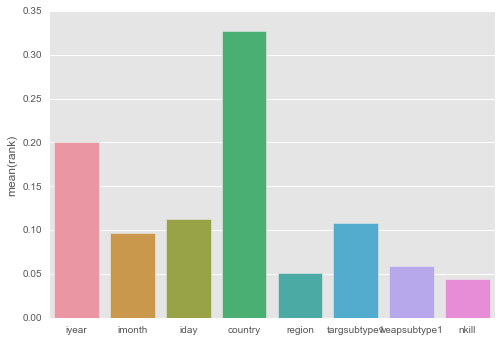

In [93]:
sns.barplot(x = df_train_x.columns, y = 'rank' , data = data_feature_rank, order = df_train_x.columns)

As you can see, the feature 'country' is ranked the highest. The rest of the features are plotted accordingly.

## Model Evaluation

The dataset has large number of instances and the features are categorical. Using a <b> Random Forest </b> will be a good choice for the model. Other model choices include Support Vector Machines, Naive Bayes Classifiers or k-NN classifiers.

A Random Forest is an ensemble of decision trees, where each tree is constructed by subsets of the training data. 

There are many advantages of using a Random Forest, the primary of them being:
1. It can handle large data sets with high dimensionality. It trains well even on high number of input features. 
2. It can handle categorical and continous variables. Other estimators in Scikit-learn need encoding of categorical
features which is not the case in Random Forest models.
3. It is more robust and accurate compared to Decision Trees
4. They perform well in multi-class classification problems and can work in regression cases too.

<b> Training and testing the model on the train data

In [96]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(df_train_x, df_train_y)
clf.score(df_train_x,df_train_y)

0.99677605368001676

We notice that the accuracy of the classifier(taken as the performance metric in this case) is <b> 99.67 %. </b> 

This is not surprising as the model is trained and tested on the same data. Though this is just for illustratory purposes - This is a classic example of Overfitting where the trained model is tested on the same dataset. The high accuracy is a red-flag. 

The model will not <b> generalize </b> well on <b> unseen data </b> . The following run of model shows the model run on new data.

In [97]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df_train_x, df_train_y, test_size=0.4, random_state=0)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape
clf = clf.fit(X_train, y_train)
print clf.score(X_test, y_test)

(45782, 8) (45782L,)
(30522, 8) (30522L,)
0.660179542625


In [98]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators=10)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df_train_x_relevant, df_train_y, test_size=0.3, random_state=0)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape
clf1 = clf1.fit(X_train, y_train)
print clf1.score(X_test, y_test)

(53412, 8) (53412L,)
(22892, 8) (22892L,)
0.695963655425


In [101]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators=50)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df_train_x_relevant, df_train_y, test_size=0.3, random_state=0)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape
clf1 = clf1.fit(X_train, y_train)
print clf1.score(X_test, y_test)

(53412, 8) (53412L,)
(22892, 8) (22892L,)


MemoryError: 

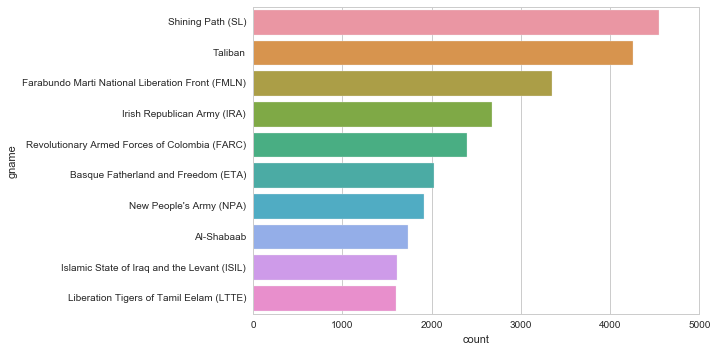

time: 1.98 s


In [207]:
ax = sns.countplot(y="gname", data=df_train, order = df_train.gname.value_counts()[:10].index)